In [1]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import thor.visualize as visualize
import thor.config as config
import thor.analyze as analyze

import visualize as vis
import utils


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



In [2]:
style = "paper"
mpl_style = visualize.visualize.styles[style]

In [3]:
base_local = config.get_outputs_directory()
analysis_directory = base_local / "analysis/gridrad_severe"

In [4]:
# Aggregate data across runs
# dfs, metadata = utils.aggregate_runs()

In [5]:
# Load aggregated runs
dfs, metadata = utils.load_aggregated_runs()

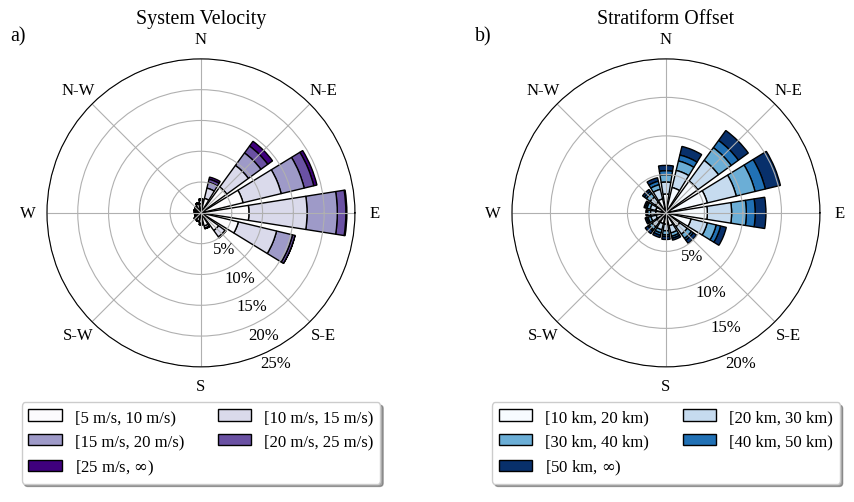

In [216]:
# Basic statistics
with plt.style.context(mpl_style), visualize.visualize.set_style(style):
    plt.close("all")
    vis.windrose(dfs, analysis_directory)
    plt.show()

In [202]:
with plt.style.context(mpl_style), visualize.visualize.set_style(style):
    plt.close("all")
    names = ["stratiform_offset", "relative_stratiform_offset", "inflow", "tilt"]
    names += ["propagation"]
    for name in names:
        vis.pie_map(dfs, name, analysis_directory)

2024-11-15 15:22:13,684 - utils - INFO - Calculating tropopause heights.
2024-11-15 15:22:36,673 - utils - INFO - Calculating shears.


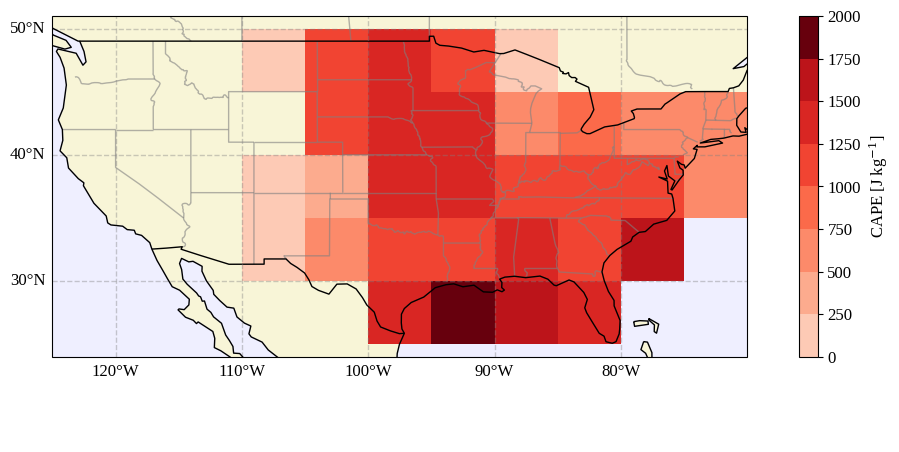

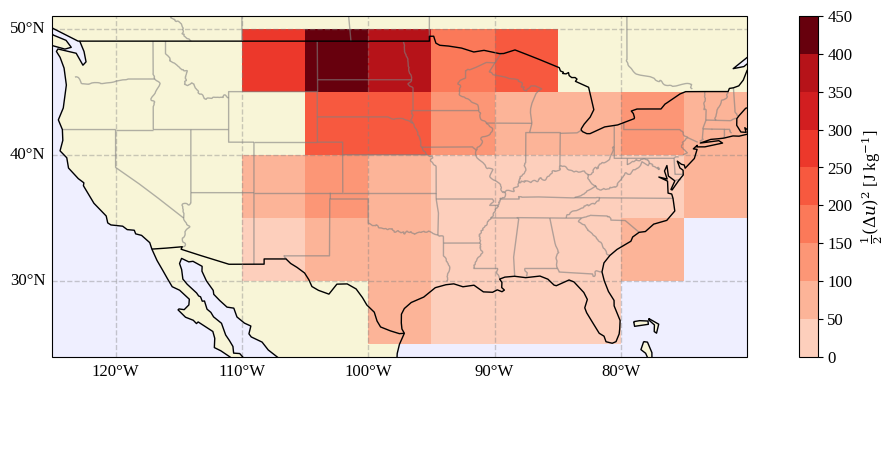

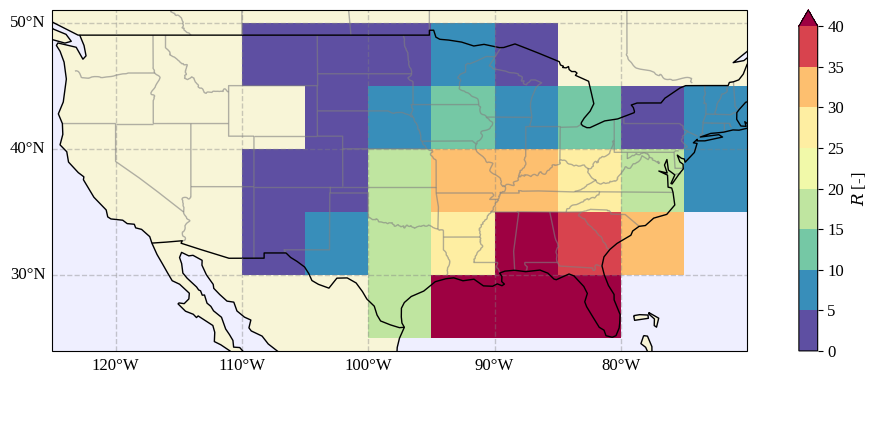

In [80]:
with plt.style.context(mpl_style), visualize.visualize.set_style(style):
    plt.close("all")
    vis.field_maps(dfs)
    plt.show()

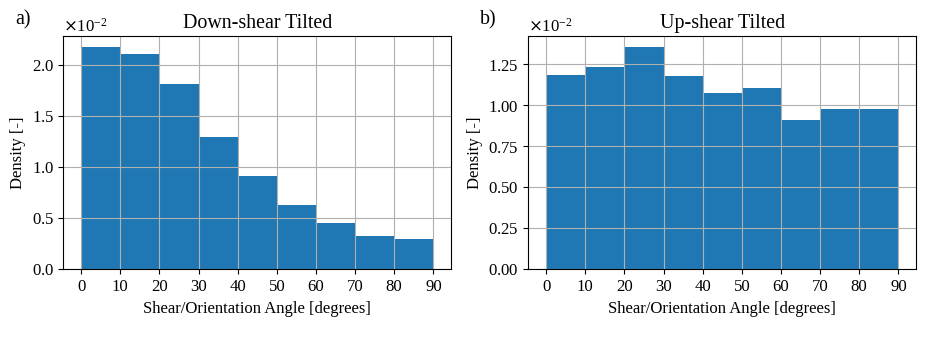

In [205]:
with plt.style.context(mpl_style), visualize.visualize.set_style(style):
    plt.close("all")
    vis.shear_orientation_angles(dfs)
    plt.show()

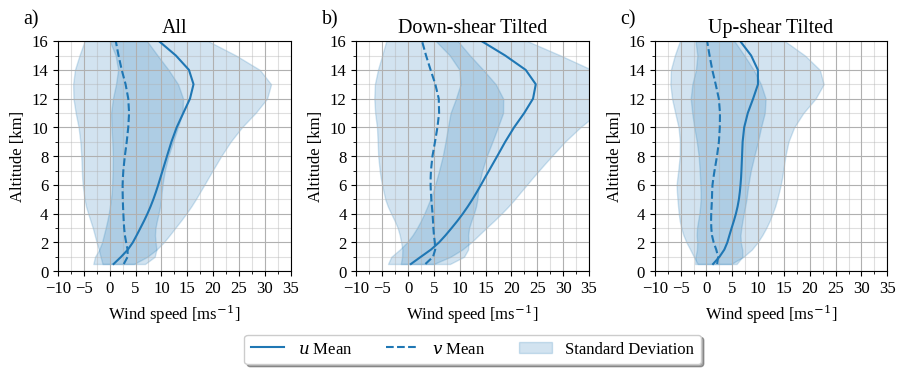

In [ ]:
with plt.style.context(mpl_style), visualize.visualize.set_style(style):
    vis.wind_profiles(dfs)
    plt.show()

2024-11-19 12:29:54,102 - utils - INFO - Calculating tropopause heights.
2024-11-19 12:30:07,997 - utils - INFO - Calculating shears.


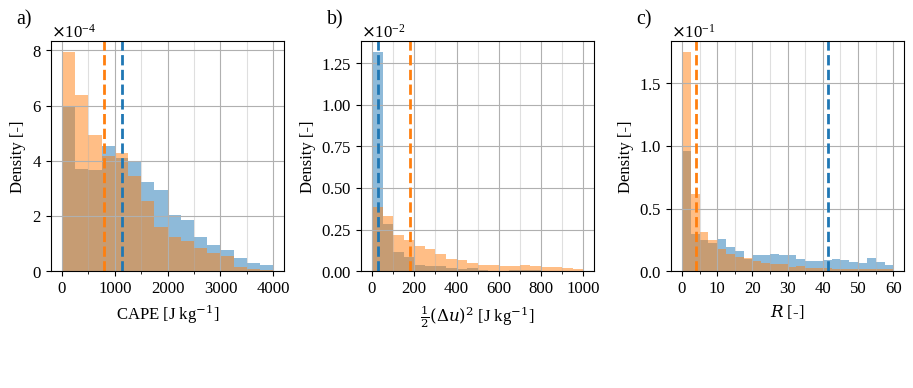

In [6]:
with plt.style.context(mpl_style), visualize.visualize.set_style(style):
    vis.cape_ake_R(dfs)
    plt.show()

In [6]:
utils.relabel_all(dfs)

2024-11-19 15:13:06,705 - utils - INFO - Re-labelling event 2010-01-20 00:00:00.
2024-11-19 15:13:07,519 - utils - INFO - Re-labelling event 2010-01-21 00:00:00.
2024-11-19 15:13:09,650 - utils - INFO - Re-labelling event 2010-03-10 00:00:00.
2024-11-19 15:13:11,284 - utils - INFO - Re-labelling event 2010-03-11 00:00:00.
2024-11-19 15:13:12,042 - utils - INFO - Re-labelling event 2010-03-28 00:00:00.
2024-11-19 15:13:12,947 - utils - INFO - Re-labelling event 2010-04-05 00:00:00.
2024-11-19 15:13:14,555 - utils - INFO - Re-labelling event 2010-04-06 00:00:00.
2024-11-19 15:13:15,565 - utils - INFO - Re-labelling event 2010-04-22 00:00:00.
2024-11-19 15:13:17,163 - utils - INFO - Re-labelling event 2010-04-23 00:00:00.
2024-11-19 15:13:20,034 - utils - INFO - Re-labelling event 2010-04-24 00:00:00.
2024-11-19 15:13:22,217 - utils - INFO - Re-labelling event 2010-04-25 00:00:00.
2024-11-19 15:13:23,151 - utils - INFO - Re-labelling event 2010-04-29 00:00:00.
2024-11-19 15:13:23,618 - ut

In [ ]:
longest_directory = analysis_directory / "attributes/longest_paths"

In [30]:
utils.aggregate_relabelled(metadata, longest_directory)

In [207]:
dfs, metadata = utils.load_aggregated_runs(longest_directory)

In [208]:
# Recalculate the duration check for the grouped systems
analysis_options = analyze.mcs.AnalysisOptions()
dfs = utils.recalculate_duration_check(dfs, analysis_options)

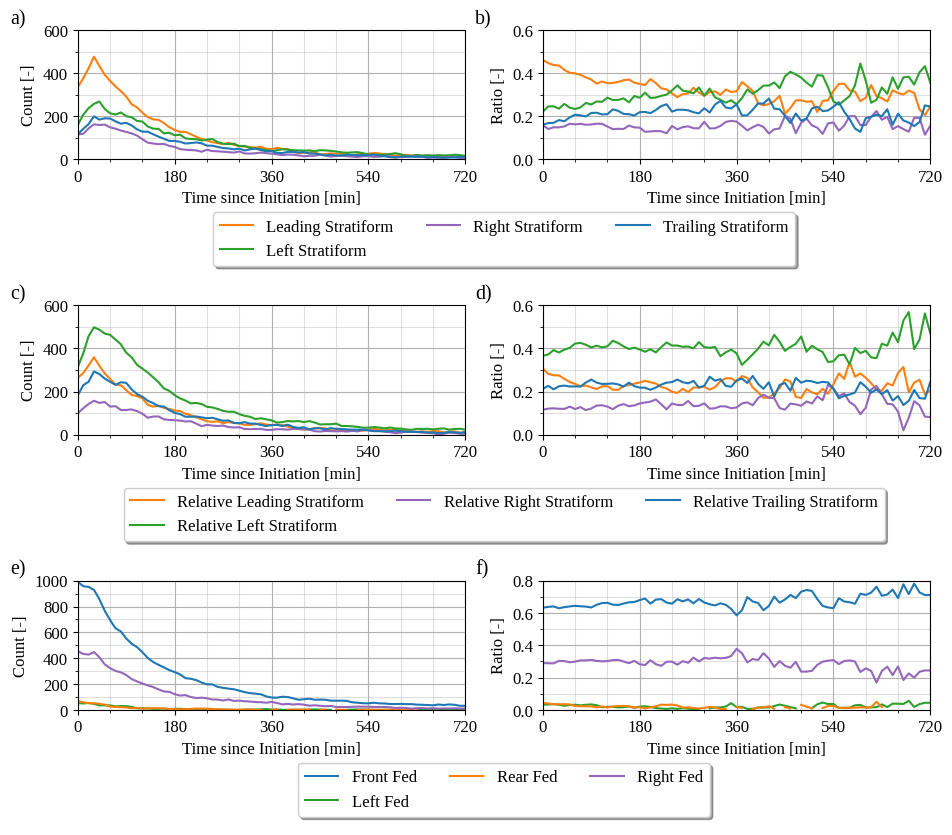

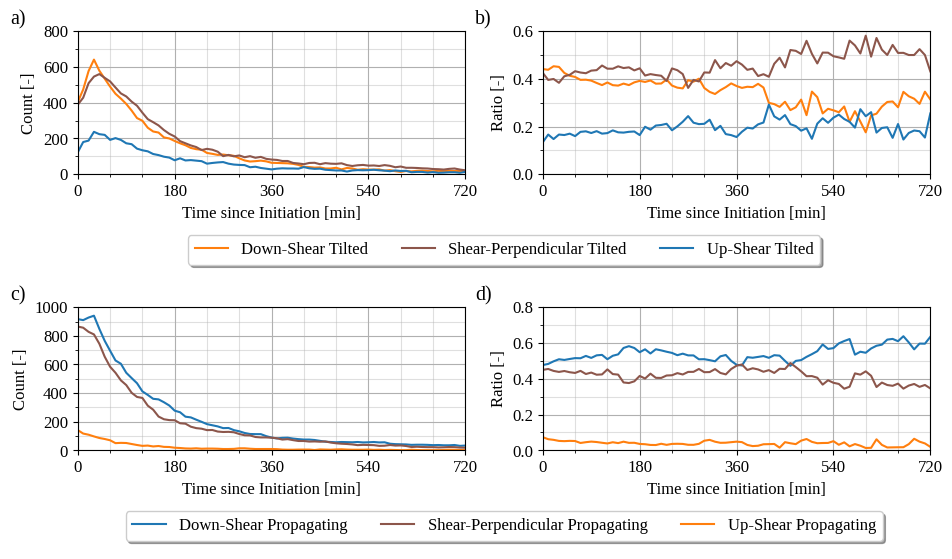

In [209]:
# Interesting! The offsets produce the big spikes!
with plt.style.context(mpl_style), visualize.visualize.set_style(style):
    args = [dfs["classification"], dfs["quality"], analysis_directory]
    vis.plot_classification_evolution(*args)
    plt.show()

2024-11-15 12:07:32,044 - visualize - INFO - Calculating minutes.
2024-11-15 12:07:58,160 - visualize - INFO - Plotting.


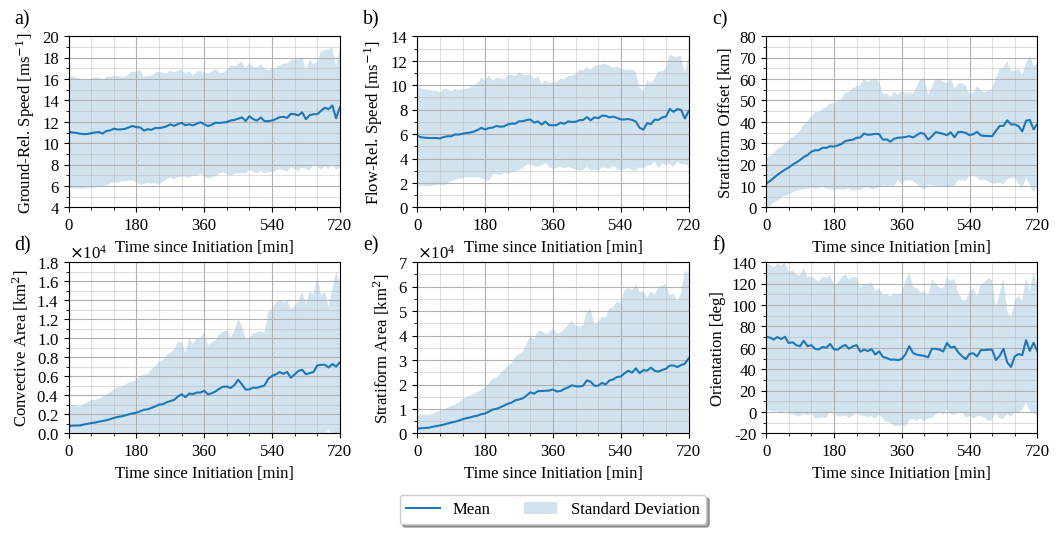

In [210]:
with plt.style.context(mpl_style), visualize.visualize.set_style(style):
    vis.plot_attribute_evolution(dfs, analysis_directory)
    plt.show()